In [349]:
import pandas as pd
import requests
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
sns.set(font_scale=1.25) 

In [350]:
country = 'czech-republic'

In [351]:
cwur2016 = requests.get(f'http://cwur.org/2016/{country}.php').content.decode('utf-8')
cwur2017 = requests.get(f'http://cwur.org/2017/{country}.php').content.decode('utf-8')

In [359]:
df2016 = pd.read_html(cwur2016)[0].set_index('Institution')
df2017= pd.read_html(cwur2017)[0].set_index('Institution')
# Remove NUM+ from columns, used for ax-equo results in CWUR rankings
for i in range(3,11):
    df2016.iloc[:,i]=df2016.iloc[:,i].apply(lambda x: int(str(x).replace('+','')))
    df2017.iloc[:,i]=df2017.iloc[:,i].apply(lambda x: int(str(x).replace('+','')))

# CWUR started adding Topx% information to world rank column in 2017, extract just the ranks
df2017['World Rank'] = df2017['World Rank'].apply(lambda x: int(x.split('Top')[0]))

# We know the country
del df2017['Location']
del df2016['Location']

In [360]:
# 2017 - 2016, drop universities not present in 2017
df_diff=(df2017-df2016).dropna().copy()
df_diff.iloc[:,:-1] = -df_diff.iloc[:,:-1] 
df_diff['rank'] = df2['National Rank']
to_plot = df3_all.sort_values('rank').iloc[:,:-1].T

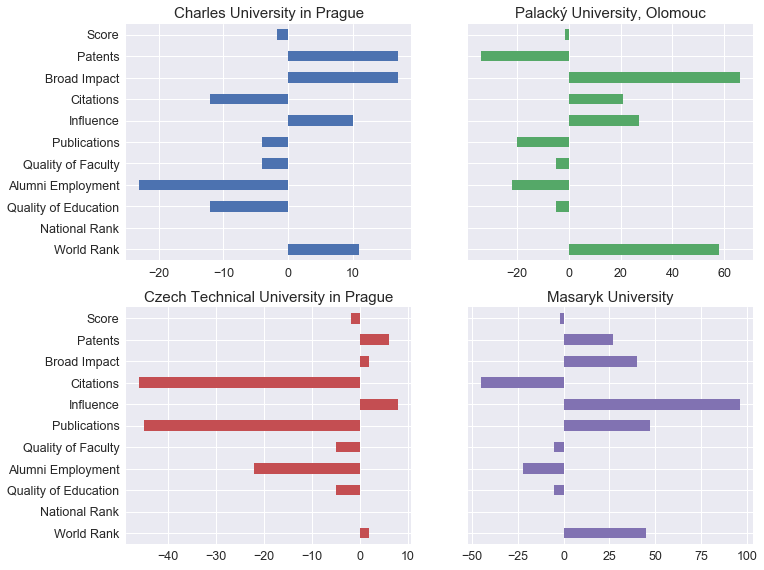

In [365]:
ax = to_plot.plot.barh(subplots=True, layout=(df_diff.shape[0], 2), figsize=(10, 20), 
                       sharex=False, sharey=True, grid=True, legend=False);